In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment4/Live.csv")

In [4]:
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
dataset = dataset.drop(["Column1", "Column2", "Column3", "Column4", "status_published", "status_id"], axis=1)

In [7]:
dataset.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['status_type'] = LE.fit_transform(dataset['status_type'])
dataset.sample(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
3590,1,16,2,0,16,0,0,0,0,0
4442,3,8,0,0,8,0,0,0,0,0
430,1,139,14,0,138,1,0,0,0,0
69,3,216,251,34,199,16,0,0,0,1
1743,1,25,1,0,25,0,0,0,0,0


In [9]:
X_new = dataset[['num_reactions', 'num_likes']]

Elbow visualization

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=0)

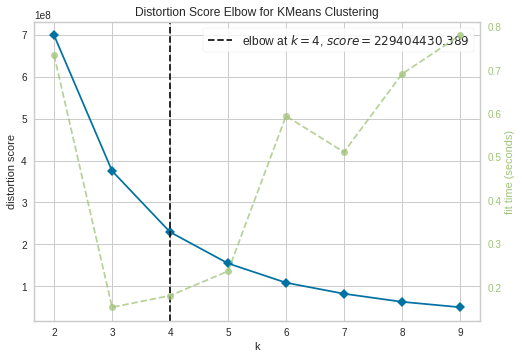

In [11]:
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(X_new)
visualizer.show()
plt.show()

Silhouette coeffecient

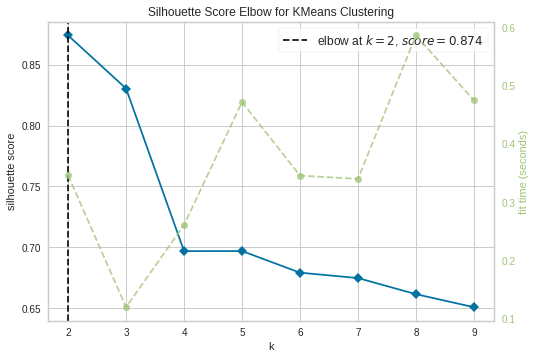

In [12]:
from sklearn import metrics
km = KMeans(random_state=0)
visualizer_sil = KElbowVisualizer(km, k=(2,10), metric='silhouette')
visualizer_sil.fit(X_new)
visualizer_sil.show()
plt.show()

Model Build

In [25]:
km = KMeans(n_clusters=4, random_state=0)
y_pred = km.fit_predict(X_new)

In [26]:
dataset['cluster'] = y_pred

In [27]:
dataset.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,0


In [28]:
km.cluster_centers_

array([[ 353.24119029,  319.24432263],
       [  54.90514439,   49.40906483],
       [1219.92105263, 1135.21637427],
       [2311.50990099, 2286.01485149]])

Cluster Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


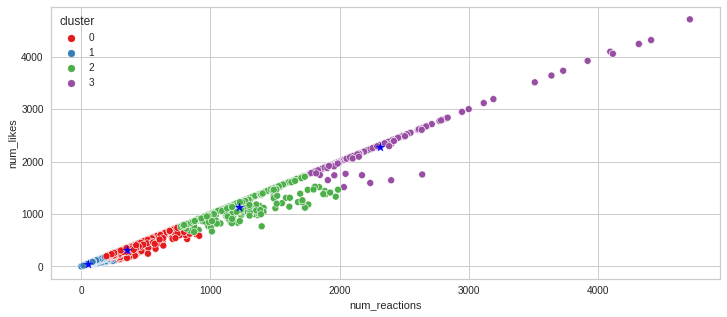

In [29]:
fig1,(axes) = plt.subplots(1, 1, figsize=(12, 5))
sns.scatterplot('num_reactions', 'num_likes', data=X_new, 
                hue=dataset['cluster'], ax=axes, palette='Set1', legend='full')
axes.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
                marker='*', s=80, c="blue")